In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.markers as marker
from PIL import Image
from sklearn.decomposition import PCA
plt.rcParams["figure.figsize"] = (20,6)

### Display the Image in Python

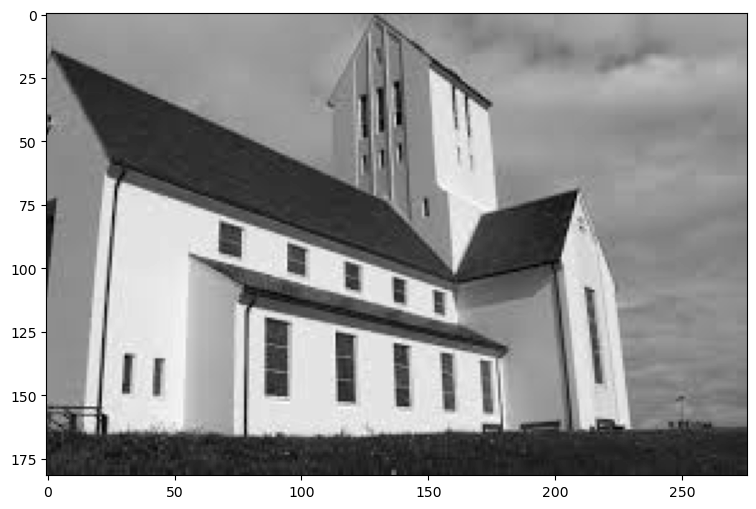

In [3]:
image = Image.open('image1.png').convert('L')

#Get image as aarray
numpydata = np.asarray(image)

plt.imshow(image, cmap = plt.cm.gray)

In [4]:
#Function to perform convolution with input, output size
def conv(imageMatrix,filter):

    size = filter.shape[0]
    new = []
    for x in range(0,imageMatrix.shape[0]-(size-1)):
        temp = []

        for i in range(0,imageMatrix.shape[1]-(size-1)):

            data = int(sum(sum(np.multiply(imageMatrix[x:x+size,i:i+size],filter))))*(1/16)
            temp.append(data)

        new.append(temp)

    return new

## Edge Detection

#### Implementation of Gaussian Filter

We create gaussian filters for $$ \sigma = 1,2, size=5$$

In [50]:
#Function to produce a gaussian filter for specific dimensions, sigma values
def gaussKernel(size=3, sigma=1):

    #Matrix -2 -> 2, for x and y
    s = int(size/2)

    #This should help produce a numpy array when we pass through gauss function, gives correct filter
    x, y = np.meshgrid(np.linspace(s, -s, size),np.linspace(-s, s, size))

    #Code for gaussian function, given sigma, x,y
    #Split to manage complexity and ensure correctness
    numerator = 1/(sigma*(np.sqrt(2.0*3.14)))
    denominator = np.exp(-(((np.square(x)) + (np.square(y)))/(2.0*(sigma**2))))

    gaussKernel = np.multiply(numerator,denominator)
    return gaussKernel

#### Part A

Text(0.5, 1.0, '$\\sigma = 2$')

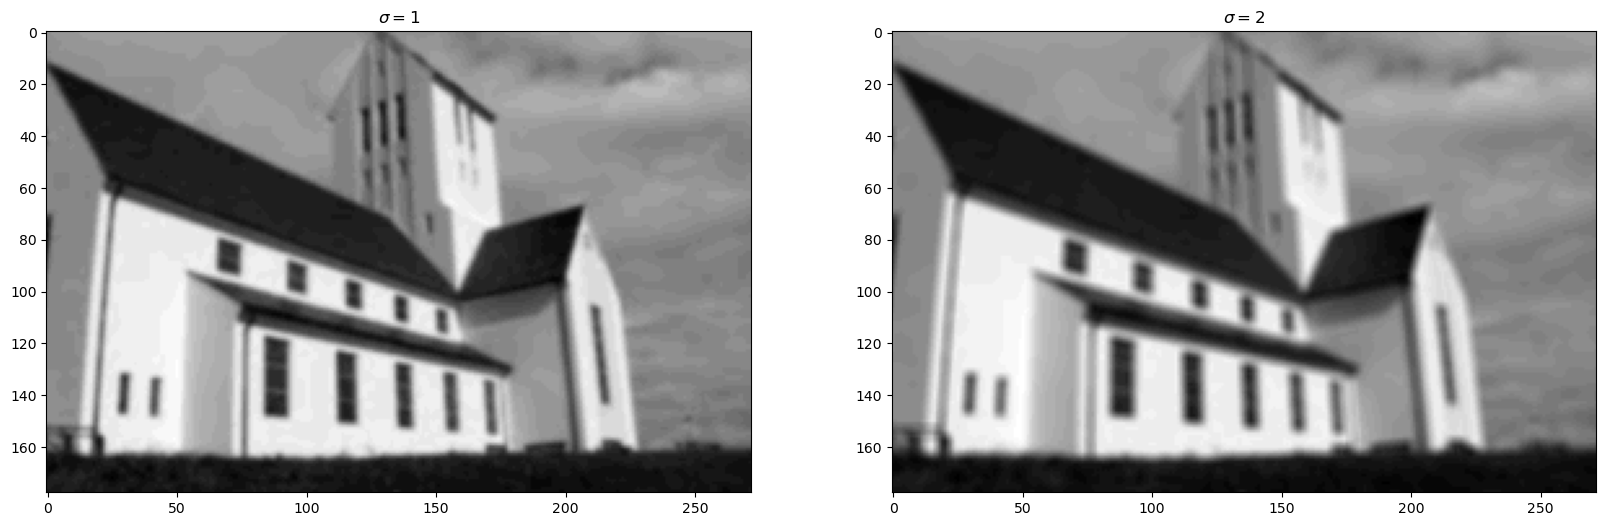

In [51]:
#Perform convolution of 5x5 gaussian filter, with sigma values 1 and 2
#Plot side by side to demonstrate difference
s1 = Image.fromarray((np.array(conv(numpydata,gaussKernel(5, 1)))).astype(np.uint8))
plt.subplot(1, 2, 1)
plt.imshow(s1, cmap = plt.cm.gray)
plt.title("$\sigma = 1$")

s2 = Image.fromarray((np.array(conv(numpydata,gaussKernel(5, 2)))).astype(np.uint8))
plt.subplot(1, 2, 2)
plt.imshow(s2, cmap = plt.cm.gray)
plt.title("$\sigma = 2$")

### Convolution with Sobel Filters $S_x, S_y$

In [52]:
#Make sobel operators
sx = np.array(([[-1,0,1],[-2,0,2],[-1,0,1]]))
sy = np.array(([[1,2,1],[0,0,0],[-1,-2,-1]]))

#### Convolution of Sobel Filters for Image with Gaussian Filter($\sigma = 1$) 

Text(0.5, 0.98, 'Convolution of Sobel Filters for Image with Gaussian Filter($\\sigma = 1$) ')

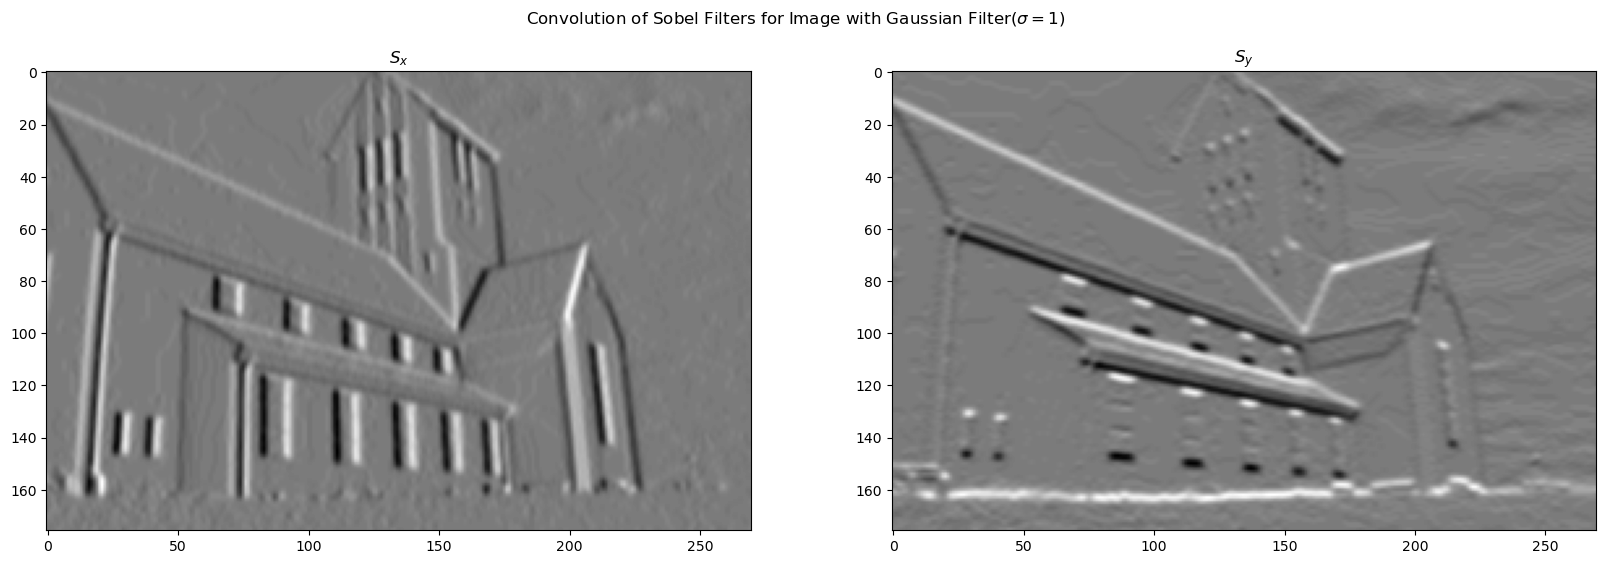

In [59]:
sobelX1 = np.array(conv(np.array(s1),sx))
plt.subplot(1, 2, 1)
plt.imshow(sobelX1, cmap = plt.cm.gray)
plt.title("$S_x$")

sobelY1 = np.array(conv(np.array(s1),sy))
plt.subplot(1, 2, 2)
plt.imshow(sobelY1, cmap = plt.cm.gray)
plt.title("$S_y$")
plt.suptitle('Convolution of Sobel Filters for Image with Gaussian Filter($\sigma = 1$) ')

#### Convolution of Sobel Filters for Image with Gaussian Filter($\sigma = 2$) 

Text(0.5, 0.98, 'Convolution of Sobel Filters for Image with Gaussian Filter($\\sigma = 2$) ')

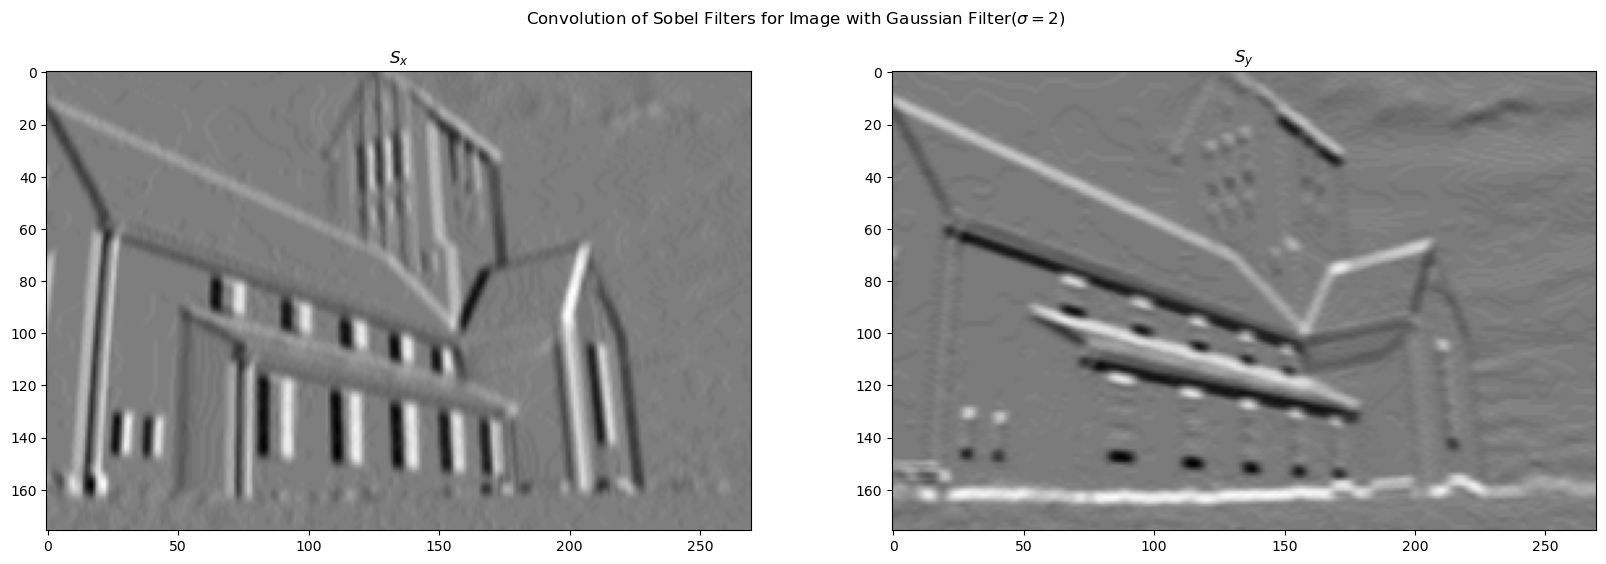

In [61]:
sobelX2 = np.array(conv(np.array(s2),sx))
plt.subplot(1, 2, 1)
plt.imshow(sobelX2, cmap = plt.cm.gray)
plt.title("$S_x$")

sobelY2 = np.array(conv(np.array(s2),sy))
plt.subplot(1, 2, 2)
plt.imshow(sobelY2, cmap = plt.cm.gray)
plt.title("$S_y$")

plt.suptitle('Convolution of Sobel Filters for Image with Gaussian Filter($\sigma = 2$) ')

#### Convolution with the Gaussian Derivative Kernels $\frac{\delta G}{\delta x}, \frac{\delta G}{\delta y}$

In [103]:
#Function to produce a gaussian filter for specific dimensions, sigma values
def gaussDerKernel(size=3, sigma=1):

    #Matrix -2 -> 2, for x and y
    s = int(size/2)
    print(s)
    #This should help produce a numpy array when we pass through gauss function, gives correct filter
    x, y = np.meshgrid(np.linspace(-s, s, size),np.linspace(-s, s, size))

    #Code for gaussian function, given sigma, x,y
    #Split to manage complexity and ensure correctness
        #Left most term is different per kernel
    gx = ((-x)/(sigma**2))
    gy = ((-y)/(sigma**2))

    denominator = np.exp(-((np.square(x) + (np.square(y)))/(2*(sigma**2))))

    #Return kernel filters for gx, gy
    return ((np.multiply(gx,denominator))),((np.multiply(gy,denominator)))

2


Text(0.5, 0.98, 'Convolution with the Gaussian Derivative Kernels $\\frac{\\delta G}{\\delta x}, \\frac{\\delta G}{\\delta y},\\sigma = 1$')

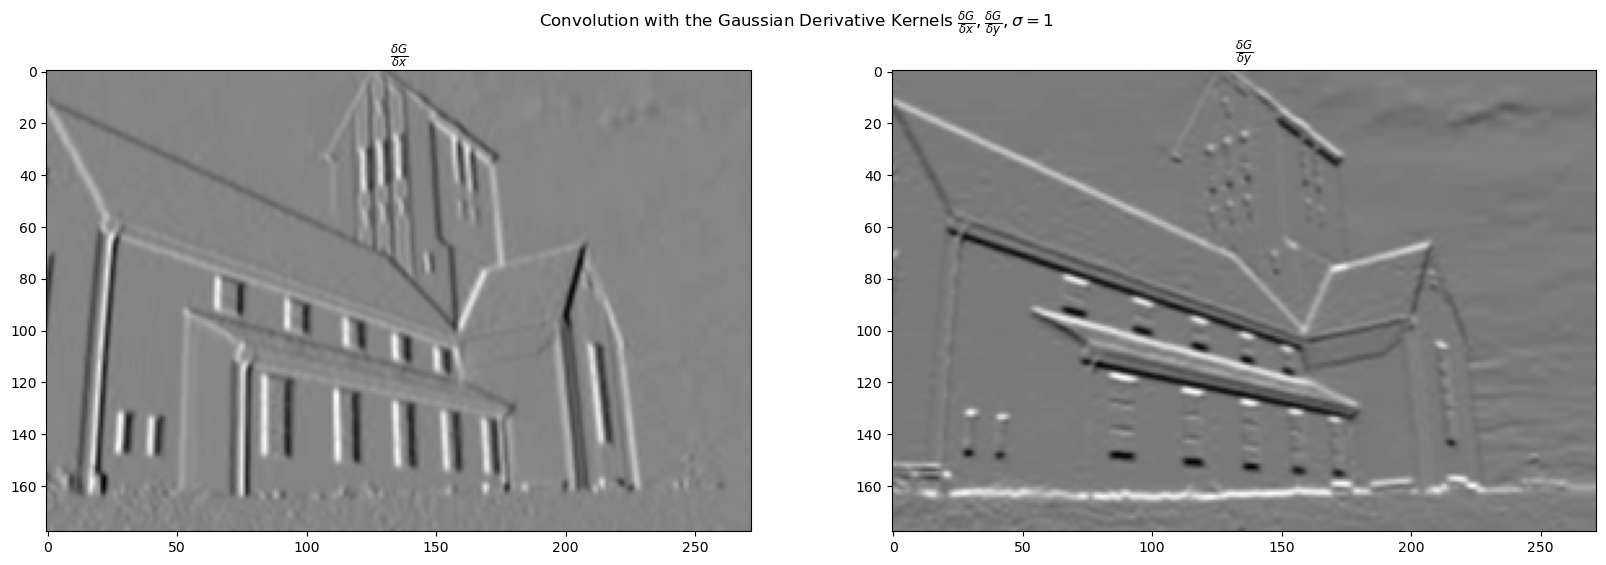

In [112]:
gx,gy = gaussDerKernel(5,1)
d1 = np.array(conv(np.array(numpydata),gx))
plt.subplot(1, 2, 1)
plt.imshow(d1, cmap = plt.cm.gray)
plt.title("$\\frac{\delta G}{\delta x}$")

d2 = np.array(conv(np.array(numpydata),gy))
plt.subplot(1, 2, 2)
plt.imshow(d2, cmap = plt.cm.gray)
plt.title("$\\frac{\delta G}{\delta y}$")

plt.suptitle('Convolution with the Gaussian Derivative Kernels $\\frac{\delta G}{\delta x}, \\frac{\delta G}{\delta y},\sigma = 1$')

2


Text(0.5, 0.98, 'Convolution with the Gaussian Derivative Kernels $\\frac{\\delta G}{\\delta x}, \\frac{\\delta G}{\\delta y},\\sigma = 2$')

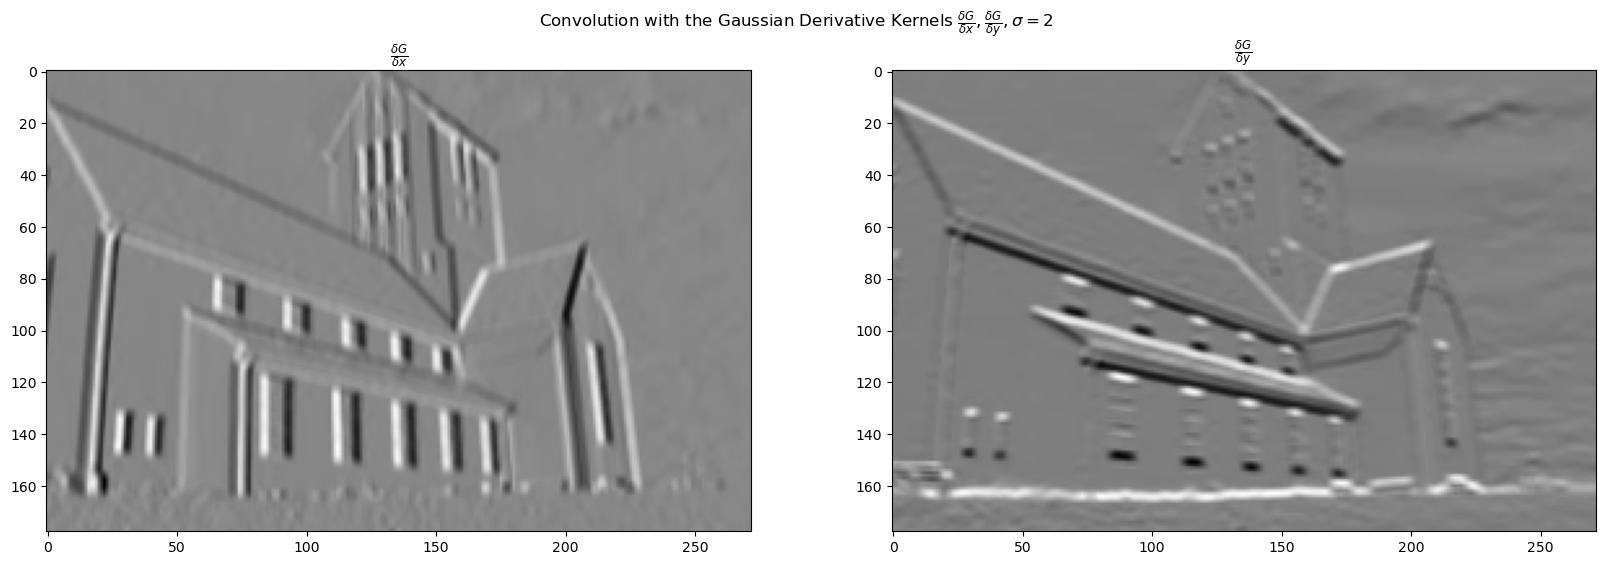

In [114]:
gx,gy = gaussDerKernel(5,2)
d1 = np.array(conv(np.array(numpydata),gx))
plt.subplot(1, 2, 1)
plt.imshow(d1, cmap = plt.cm.gray)
plt.title("$\\frac{\delta G}{\delta x}$")
#Gaussian Gradient Detection Mask
d2 = np.array(conv(np.array(numpydata),gy))
plt.subplot(1, 2, 2)
plt.imshow(d2, cmap = plt.cm.gray)
plt.title("$\\frac{\delta G}{\delta y}$ ")

plt.suptitle('Convolution with the Gaussian Derivative Kernels $\\frac{\delta G}{\delta x}, \\frac{\delta G}{\delta y},\sigma = 2$')

## Corner Detection

#### Color to Grayscale

In [65]:
image = Image.open('image1.png').convert('L')
#Get image as aarray
numpydata = np.asarray(image)

#### Spatial Derivative Calculation

In [30]:
#Ix, iy computed with Sobel operators from earlier
ix = np.array(conv(np.array(numpydata),sx)) 
iy = np.array(conv(np.array(numpydata),sy))

#### Structure $M$ Tensor Setup

In [57]:
#Get values to use in Harris calculation(So Matrix M's values)
iXX = np.square(ix)
iYY = np.square(iy)
iyx = ix*iy


#In the equation we use a window function, so here we apply gaussian filter on each of the values
gaussianfilter = gaussKernel(5, 1)
iXX = np.array(conv(iXX,gaussianfilter))
iYY = np.array(conv(iYY,gaussianfilter))
iyx = np.array(conv(iyx,gaussianfilter))

#### Corner Response Calculation & Non-Max Supression

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Harris Corner Detection')

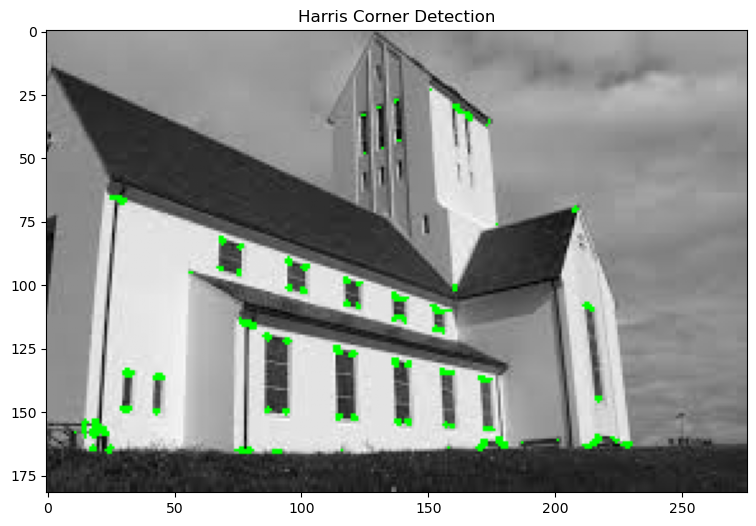

In [115]:
#Coloured version to use to illustrate corners detected
cmap = plt.get_cmap(plt.cm.gray)
corners_image = cmap(numpydata)

#Constant Value
k = 0.04

#Corner response calculations
#These are taken from the lecture slides
det = (iXX * iYY) - (np.square(iyx))
trace = iXX + iYY
harris_response = np.pad(det -(k * (np.square(trace))),3)


# for rowindex in range(1,len(harris_response)):
#     for colindex in range(1,len(harris_response[0])):

#         HR = harris_response[rowindex][colindex]

#         if HR > np.max(harris_response)*0.1:
#             corners_image[rowindex+3][colindex+3] = [0,255,0,1]
# if harris_response  > np.max(harris_response)*0.1:   
#     corners_image[rowindex+3][colindex+3] = [0,255,0,1]

#NMS Implemented
#We specify this as a temporary threshold
threshold = 0.1*np.max(harris_response)
corners_image[harris_response > threshold]=[0,255,0,1]

#Demonsrate the NMS output
plt.imshow(corners_image)
plt.title("Harris Corner Detection")

Text(0.5, 1.0, 'Corner Response Map')

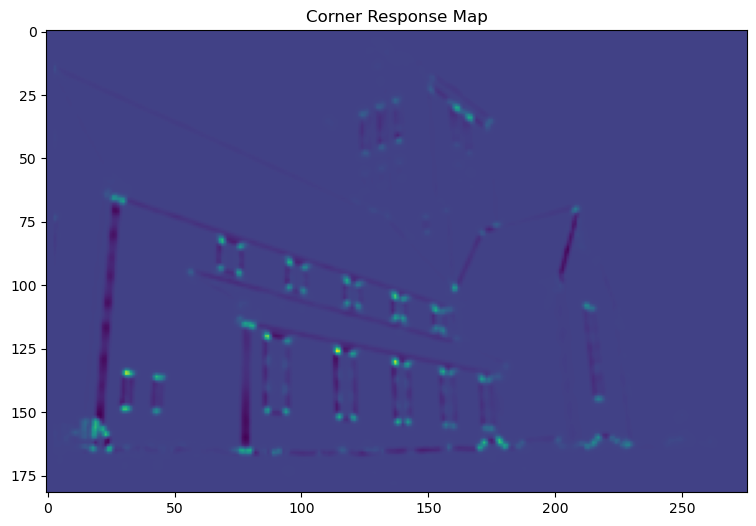

In [116]:
plt.imshow(np.array(harris_response))
plt.title("Corner Response Map")